*   **Aluno:** Maxmiliano Augusto Gomes da Silva
*   **E-mail:** mags@cesar.school
*   **Link do Dataset:** [Listagem de Filmes Brasileiros e Estrangeiros Lançados 2009 a 2024](https://www.gov.br/ancine/pt-br/oca/cinema-)


# **1. Obtenção dos dados**


*   Os dados foram obtidos no site da Agência Nacional do Cinema - (ANCINE). No portal, dentre diversas bases de dados, selecionamos a que se refere à listagem de filmes brasileiros e estrangeiros lançados, em território nacional, no perído de 2009 a 2024.

In [327]:
# Importar bibliotecas de manipulação e visualização de dados:

import pandas as pd
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

plt.style.use("ggplot")

In [328]:
# Importar base de dados:

url = 'https://github.com/maxmizard/estatistica/raw/refs/heads/main/listagem-de-filmes-brasileiros-e-estrangeiros-lancados-2009-a-2024.xlsx'
response = requests.get(url)
df_ancine = pd.read_excel(BytesIO(response.content), skiprows=1, nrows=6098)
df_ancine

,Ano de Lançamento,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Salas no Lançamento,Máximo de Salas Ocupadas,Público acumulado,Renda (R$) acumulada
0,2009,1983.. O Ano Azul,B0901024500000,Documentário,Brasil,Brasileira,2009-06-05,Prana Filmes,Distribuição Nacional,2,2,2313,23001.98
1,2009,2012,E1600546500000,Ficção,Estados Unidos,Estrangeira,2009-11-13,Sony,Distribuição Internacional,684,684,5279983,44728067
2,2009,23 Anos Em 7 Segundos: 1977 - O Fim Do Jejum C...,B0901028800000,Documentário,Brasil,Brasileira,2009-06-26,Fox,Distribuição Internacional,7,7,1718,14936
3,2009,3 Macacos,E1402603000000,Ficção,Turquia,Estrangeira,2009-02-27,Imovision,Distribuição Nacional,2,6,13278,128998.84
4,2009,500 Dias Com Ela,E1500675000000,Ficção,Estados Unidos,Estrangeira,2009-11-06,Fox,Distribuição Internacional,37,88,245906,2305334
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,2024,Wish: O Poder Dos Desejos,E2300491500000,Animação,Estados Unidos,Estrangeira,2024-01-04,Disney,Distribuição Estrangeira,1316,1316,1955150,37406745.2
6094,2024,Zé,B2300011000000,Ficção,Brasil,Brasileira,2024-08-29,Embaúba Filmes,Distribuição Nacional,9,9,917,11957.11
6095,2024,Zona De Exclusão,E2400099200000,Ficção,Alemanha; Bélgica; Estados Unidos; França; Pol...,Estrangeira,2024-04-18,A2 Filmes,Distribuição Nacional,8,8,407,6841.08
6096,2024,Zona De Interesse,E2300522600000,Ficção,Estados Unidos; Polônia; Reino Unido,Estrangeira,2024-02-15,Diamond Films Do Brasil,Distribuição Estrangeira,176,176,180774,3783638.01


##**1.1 Dicionário de dados**

* Ano de Lançamento: Ano de lançamento do filme no Brasil.
* Título da obra: Título do filme em português.
* CPB/ROE: Identificador do Certificado de Produto Brasileiro (CPB) e do Registro de Obra Estrangeira (ROE) de obras audiovisuais no Brasil.
* Gênero: Tipo de gênero do filme.
* País(es) produtor(es) da obra: Nome dos países que participaram da produção do filme. Em caso de mais de um país, esses são separados por vírgula.
* Nacionalidade da obra: Assume os valores 'Brasileira' ou 'Estrangeira'. - **Nossa variável target**
* Data de lançamento: Data de lançamento do filme no Brasil, no formato YYYY-MM-DD.
* Empresa distribuidora: Nome da empresa que fez a distribuição do filme no Brasil.
* Origem da empresa distribuidora: Referente ao país de origem da empresa que fez a distribuição do filme no Brasil. Assume os valores 'Distribuição Nacional', 'Distribuição Internacional', 'Codistribuição Internacional-Nacional', 'Distribuição Estrangeira'.
* Salas no Lançamento: Quantidade de salas de cinema disponíveis na data de lançamento do filme.
* Máximo de Salas Ocupadas: Quantidade máxima de salas de cinema .disponíveis durante o período de exibição do filme.
* Público acumulado: Total de espectadores do filme em território brasileiro.
* Renda (R$) acumulada: Total de bilheteria que o filme fez em território brasileiro.

##**1.2 Notas**

1. Este arquivo disponibiliza os filmes lançados por ano. Os dados de renda e público são relativos ao ano de lançamento do filme, acrescido de pré-estreias e exibições entre os anos de 2009 e 2022.
2. A distribuidora neste arquivo é a empresa que realizou a distribuição do filme na semana de seu lançamento.
3. Para um melhor alinhamento com o mercado internacional, as obras registradas na ANCINE com distribuição da Paramount, que atua no Brasil também comercializando obras dos estúdios Universal, foram desagregadas entre as duas empresas, seguindo o padrão de distribuição no exterior.
4. Para um filme ser considerado brasileiro, ele deve possuir o Certificado de Produto Brasileiro (CPB).
5. Os valores de renda disponíveis neste arquivo são valores correntes do ano de referência.
6. ND: dados não informados pela distribuidora/exibidora até a data de compilação dos dados.
7. O ano de lançamento corresponde aos seguintes períodos: 2023: 05/01/2023 a 03/01/2024; 2022: 06/01/2022 a 04/01/2023; 2021: 07/01/2021 a 05/01/2022, 2020: 02/01/2020 a 06/01/2021, 2019: 01/01/2019 a 31/12/2019, 2018: 01/01/2018 a 31/12/2018, 2017: 05/01/2017 a 03/01/2018, 2016: 07/01/2016 a 04/01/2017, 2015: 01/01/2015 a 06/01/2016, 2014: 03/01/2014 a 31/12/2014, 2013: 04/01/2013 a 02/01/2014, 2012: 06/01/2012 a 03/01/2013, 2011: 31/12/2010 a 05/01/2012, 2010: 01/01/2010 a 30/12/2010 e 2009: 02/01/2009 a 31/12/2009.
8. Até 2020, foram consideradas distribuidoras internacionais as empresas brasileiras subsidiárias dos grandes estúdios de produção e distribuição dos Estados Unidos da América (EUA): Paramount, Universal, Disney, Sony, Fox e Warner. Todas as demais foram definidas como empresas nacionais de distribuição. As parcerias de distribuição entre distribuidoras internacionais e distribuidoras nacionais foram classificadas como Codistribuição Internacional-Nacional. A partir de 2021, o critério de classificação das distribuidoras teve como base o Módulo de Registro de Agente Econômico do Sistema Ancine Digital - SAD. Em relação às distribuidoras nacionais, foram considerados como distribuição nacional os longas-metragens distribuídos por empresas brasileiras classificadas nos termos do art.1º, §2º da MP 2.228-1/2001, isto é, constituídas sob as leis brasileiras, com sede e administração no país, cuja maioria do capital total e votante seja de titularidade direta ou indireta de brasileiros natos ou naturalizados há mais de 10 (dez) anos, os quais devem exercer de fato e de direito o poder decisório da empresa.
9. No ano de 2019, foram verificadas inconsistências nas informações do SADIS (Sistema de Acompanhamento da Distribuição em Salas de Exibição) em relação à data de lançamento de algumas obras. Nesses casos, os valores referentes a Salas no Lançamento e Máximo de Salas foram ajustados a partir de informações oriundas do Sistema de Controle de Bilheteria (SCB).
10. Na atualização deste arquivo publicada em 28/03/2022, os dados referentes ao ano de 2019 sofreram correções, em virtude de inconsistências encontradas. Nestas alterações, destacamos, dentre outras, a exclusão de filmes que não se enquadravam como longa-metragem, a correção de datas de lançamento e gêneros cinematográficos, bem como, atualizações de informações sobre distribuidoras, a partir de novas informações. Os números referentes ao ano de 2019, no entanto, continuam refletindo a posição no Sistema Ancine de Distribuição (SADIS) em 04/05/2020.


# **2. Tratamento inicial dos dados**

In [329]:
# Checar o tamanho do Dataset:

df_ancine.shape

(6098, 13)

In [330]:
# Verificar informações gerais do Dataset:

df_ancine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6098 entries, 0 to 6097
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ano de Lançamento                6098 non-null   int64         
 1   Título da obra                   6098 non-null   object        
 2   CPB/ROE                          6098 non-null   object        
 3   Gênero                           6098 non-null   object        
 4   País(es) produtor(es) da obra    6098 non-null   object        
 5   Nacionalidade da obra            6098 non-null   object        
 6   Data de lançamento               6098 non-null   datetime64[ns]
 7   Empresa distribuidora            6098 non-null   object        
 8   Origem da empresa distribuidora  6098 non-null   object        
 9   Salas no Lançamento              6095 non-null   object        
 10  Máximo de Salas Ocupadas         6098 non-null   object     

## **2.1 Verificação de valores nulos e duplicados**

In [331]:
# Mesmo com todas as células preenchidas, alguns valores são 'ND' (Não Declarados).

df_ancine[df_ancine.applymap(lambda x: x == "ND").any(axis=1)]

<ipython-input-331-9acf206a8177>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_ancine[df_ancine.applymap(lambda x: x == "ND").any(axis=1)]


,Ano de Lançamento,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Salas no Lançamento,Máximo de Salas Ocupadas,Público acumulado,Renda (R$) acumulada
132,2009,Fumando Espero,B0800936700000,Documentário,Brasil,Brasileira,2009-04-24,Gávea Filmes E Produções,Distribuição Nacional,ND,7,2596,16555.5
189,2009,Naufrágio - Mistério E Morte Na Catástrofe Do ...,B1101495000000,Documentário,Brasil,Brasileira,2009-12-25,Master Shot Produções,Distribuição Nacional,ND,ND,ND,ND
282,2009,Tony Manero,E1600635000000,Ficção,Chile,Estrangeira,2009-04-10,Imovision,Distribuição Nacional,ND,8,280,2020.5
302,2009,"Vamos Subir, Leão",Sem CPB,Documentário,Brasil,Brasileira,2009-03-20,Canal 3,Distribuição Nacional,ND,ND,ND,ND
461,2010,Luto Como Mãe,B1101395900000,Documentário,Brasil,Brasileira,2010-08-20,Tv Zero Cinema,Distribuição Nacional,ND,ND,ND,ND
651,2011,A Última Estrada Da Praia,B1101383500000,Ficção,Brasil,Brasileira,2011-09-16,Okna Produções,Distribuição Nacional,ND,ND,ND,ND
854,2011,Os Muppets,E1600213100000,Ficção,Estados Unidos,Estrangeira,2011-12-02,Disney,Distribuição Internacional,ND,276,245715,1983418.79
869,2011,Poema De Salvação,E1600211700000,Ficção,Argentina,Estrangeira,2011-09-30,Canzión Filmes,Distribuição Nacional,ND,ND,ND,ND
872,2011,Porta A Porta – A Política Em Dois Tempos,B1101435200000,Documentário,Brasil,Brasileira,2011-12-02,Zéfiro Produções,Distribuição Nacional,ND,ND,ND,ND
952,2011,Walachai,B1001193200000,Documentário,Brasil,Brasileira,2011-11-18,Ciclorama Filmes,Distribuição Nacional,ND,8,1262,11903.08


In [332]:
# A princípio, vamos substituir os valores "ND" pela palavra reservada None.

df_ancine = df_ancine.replace("ND", None)

In [333]:
# Checar se existem valores duplicados.

df_ancine.duplicated().sum()

np.int64(0)

## **2.2 Ajuste dos tipo das colunas**




In [334]:
# Alterar formato da coluna 'Renda (R$) acumulada' para float.
# Já as colunas 'Público acumulado', 'Salas no Lançamento' e 'Máximo de Salas Ocupadas'
# serão convertidas para o tipo inteiro.

df_ancine['Renda (R$) acumulada'] = df_ancine['Renda (R$) acumulada'].astype(float)
df_ancine['Público acumulado'] = df_ancine['Público acumulado'].astype('Int64')
df_ancine['Salas no Lançamento'] = df_ancine['Salas no Lançamento'].astype('Int64')
df_ancine['Máximo de Salas Ocupadas'] = df_ancine['Máximo de Salas Ocupadas'].astype('Int64')

In [335]:
# Verificando novamente o tipo das colunas.

df_ancine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6098 entries, 0 to 6097
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ano de Lançamento                6098 non-null   int64         
 1   Título da obra                   6098 non-null   object        
 2   CPB/ROE                          6098 non-null   object        
 3   Gênero                           6098 non-null   object        
 4   País(es) produtor(es) da obra    6098 non-null   object        
 5   Nacionalidade da obra            6098 non-null   object        
 6   Data de lançamento               6098 non-null   datetime64[ns]
 7   Empresa distribuidora            6098 non-null   object        
 8   Origem da empresa distribuidora  6098 non-null   object        
 9   Salas no Lançamento              6072 non-null   Int64         
 10  Máximo de Salas Ocupadas         6082 non-null   Int64      

## **2.3 Filtros e agrupamentos**

In [336]:
# Para seguir a análise, vamos definir um recorte desse Dataset, visto que ele possui registros desde 2009.

sorted(list(df_ancine["Ano de Lançamento"].unique()))

[np.int64(2009),
 np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021),
 np.int64(2022),
 np.int64(2023),
 np.int64(2024)]

In [337]:
# Vamos criar um DataFrame para o ano de 2023:

df_ancine_2023 = df_ancine[df_ancine["Ano de Lançamento"]==2023]
df_ancine_2023 = df_ancine_2023.drop(columns=['Ano de Lançamento'], axis=1)
df_ancine_2023.reset_index(drop=True, inplace=True)
df_ancine_2023

,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Salas no Lançamento,Máximo de Salas Ocupadas,Público acumulado,Renda (R$) acumulada
0,13 Exorcismos,E2200426000000,Ficção,Espanha,Estrangeira,2023-02-23,Diamond Films Do Brasil,Distribuição Estrangeira,294,294,115589,2.214280e+06
1,65 Ameaça Pré-Histórica,E2300025600000,Ficção,Estados Unidos,Estrangeira,2023-03-09,Sony,Distribuição Estrangeira,715,715,237849,4.678153e+06
2,97 Minutos,E2300279400000,Ficção,Estados Unidos,Estrangeira,2023-10-19,Cinecolor Do Brasil,Distribuição Estrangeira,82,82,4263,7.986788e+04
3,A Alma Quer Voar,B2100203300000,Ficção,Brasil; Colômbia,Brasileira,2023-05-18,Retrato Filmes,Distribuição Nacional,2,2,129,1.441870e+03
4,A Baleia,E2300007400000,Ficção,Estados Unidos,Estrangeira,2023-02-23,Califórnia Filmes,Distribuição Nacional,209,273,433381,1.078141e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
410,Van Gogh: Campos De Trigo E Céus Nublados,E2200285900000,Documentário,Itália,Estrangeira,2023-07-27,Risi Film,Distribuição Estrangeira,2,2,113,1.471000e+03
411,Velozes E Furiosos 10,E2300058300000,Ficção,Estados Unidos,Estrangeira,2023-05-18,Warner,Distribuição Estrangeira,2277,2277,6461862,1.339345e+08
412,Vento Na Fronteira,B2100315800000,Documentário,Brasil,Brasileira,2023-06-08,Taturana,Distribuição Nacional,2,2,266,3.918690e+03
413,Vidas Descartáveis,B2300135700000,Documentário,Brasil,Brasileira,2023-08-24,Bretz Filmes,Distribuição Nacional,1,1,71,1.359830e+03


In [338]:
# Também vamos criar um Dataframe para o ano de 2024:

df_ancine_2024 = df_ancine[df_ancine["Ano de Lançamento"]==2024]
df_ancine_2024 = df_ancine_2024.drop(columns=['Ano de Lançamento'], axis=1)
df_ancine_2024.reset_index(drop=True, inplace=True)
df_ancine_2024

,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Salas no Lançamento,Máximo de Salas Ocupadas,Público acumulado,Renda (R$) acumulada
0,13 Sentimentos,B2400158500000,Ficção,Brasil,Brasileira,2024-06-13,Vitrine Filmes,Distribuição Nacional,36,36,5978,111644.46
1,171,B2200317100000,Documentário,Brasil,Brasileira,2024-11-21,Zeta Filmes,Distribuição Nacional,5,5,150,2427.03
2,1798 Revolta Dos Búzios,B1800307800000,Documentário,Brasil,Brasileira,2024-05-30,Abará Filmes,Distribuição Nacional,12,12,3385,51548.16
3,20 Dias Em Mariupol,E2400053600000,Documentário,Ucrânia,Estrangeira,2024-03-07,Synapse,Distribuição Nacional,19,19,2171,37305.24
4,20.000 Espécies De Abelhas,E2400089600000,Ficção,Espanha,Estrangeira,2024-04-11,Imovision,Distribuição Estrangeira,14,14,2455,44310.49
...,...,...,...,...,...,...,...,...,...,...,...,...
451,Wish: O Poder Dos Desejos,E2300491500000,Animação,Estados Unidos,Estrangeira,2024-01-04,Disney,Distribuição Estrangeira,1316,1316,1955150,37406745.20
452,Zé,B2300011000000,Ficção,Brasil,Brasileira,2024-08-29,Embaúba Filmes,Distribuição Nacional,9,9,917,11957.11
453,Zona De Exclusão,E2400099200000,Ficção,Alemanha; Bélgica; Estados Unidos; França; Pol...,Estrangeira,2024-04-18,A2 Filmes,Distribuição Nacional,8,8,407,6841.08
454,Zona De Interesse,E2300522600000,Ficção,Estados Unidos; Polônia; Reino Unido,Estrangeira,2024-02-15,Diamond Films Do Brasil,Distribuição Estrangeira,176,176,180774,3783638.01


#**3. Problema de negócio**

Nosso problema de negócio consiste em prever a nacionalidade da obra. Ou seja, se o filme é de nacionalidade estrangeira ou brasileira.

Para isso, vamos criar um **modelo de rede neural** - para realizar a classificação das obras - com base nos filmes lançados em 2023. Nosso objetivo é validar o modelo diretamente com novos filmes disponíveis na base de 2024.

# **4. Preparação dos dados**

In [339]:
# Para nosso modelo, vamos utilizar as seguintes colunas como variáveis de entrada:
# 'Público acumulado' e 'Renda (R$) acumulada'

X = df_ancine_2023[['Público acumulado', 'Renda (R$) acumulada']]
X = X.rename(columns={'Público acumulado': 'publico', 'Renda (R$) acumulada': 'renda'})
X

,publico,renda
0,115589,2.214280e+06
1,237849,4.678153e+06
2,4263,7.986788e+04
3,129,1.441870e+03
4,433381,1.078141e+07
...,...,...
410,113,1.471000e+03
411,6461862,1.339345e+08
412,266,3.918690e+03
413,71,1.359830e+03


In [340]:
# Já nossa variável alvo será a 'Nacionalidade da obra':

y = df_ancine_2023['Nacionalidade da obra']
y.name = 'nacionalidade'
y

,nacionalidade
0,Estrangeira
1,Estrangeira
2,Estrangeira
3,Brasileira
4,Estrangeira
...,...
410,Estrangeira
411,Estrangeira
412,Brasileira
413,Brasileira


In [341]:
# Como podemos observar, nossa variável alvo possui dois valores:
# 'Estrangeira' e 'Brasileira'.
# Essa é a classificação que queremos prever através da renda e do público do filme.

y.unique()

array(['Estrangeira', 'Brasileira'], dtype=object)

## **4.1 Distribuição das variáveis**

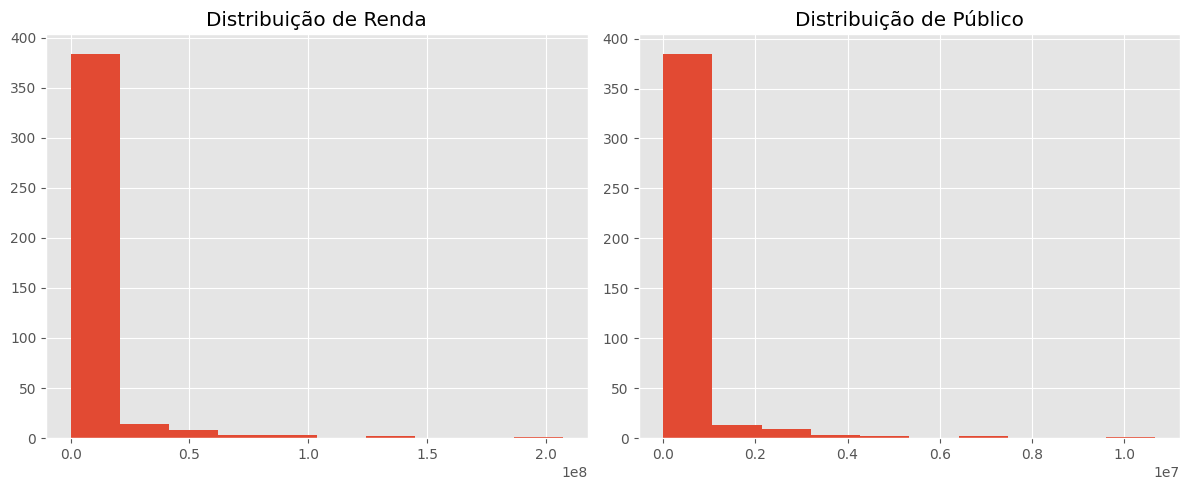

In [342]:
# Criar a figura e os eixos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

# Histograma de renda
axes[0].hist(X.renda)
axes[0].set_title('Distribuição de Renda')

# Histograma de público
axes[1].hist(X.publico)
axes[1].set_title('Distribuição de Público')

# Mostrar os gráficos
plt.tight_layout()
plt.show()


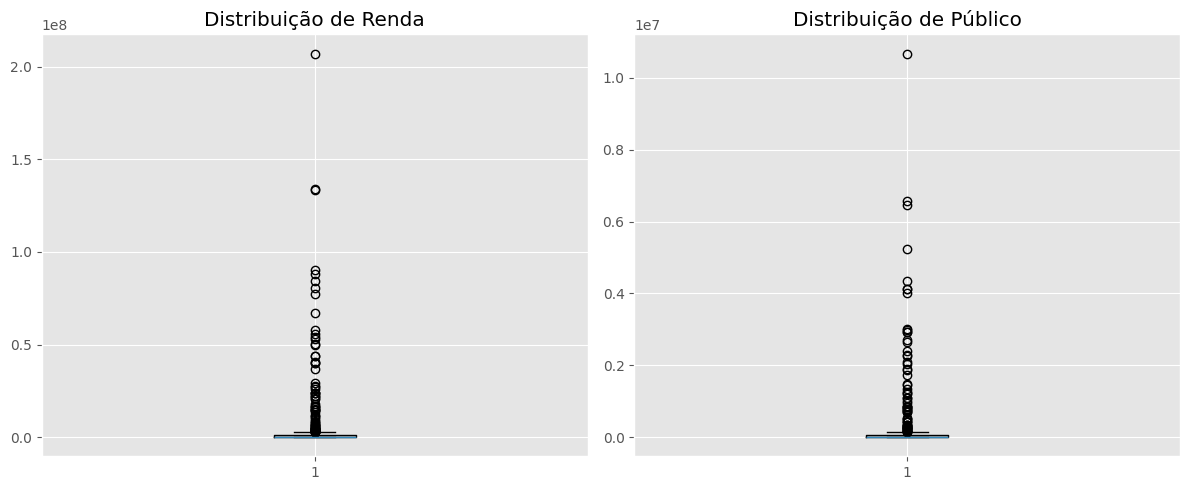

In [343]:
# Criar a figura e os eixos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

# Boxplot de renda
axes[0].boxplot(X.renda)
axes[0].set_title('Distribuição de Renda')

# Boxplot de público
axes[1].boxplot(X.publico)
axes[1].set_title('Distribuição de Público')

# Mostrar os gráficos
plt.tight_layout()
plt.show()

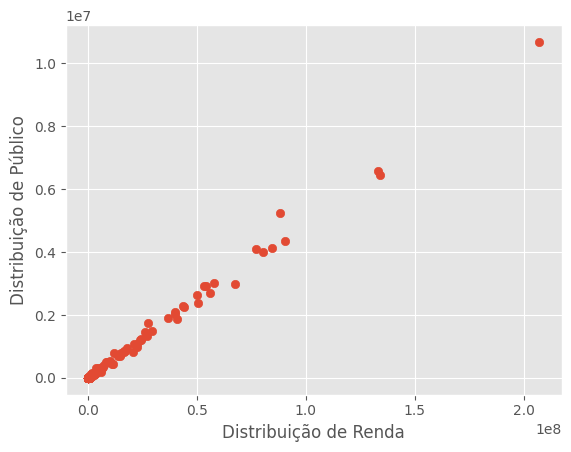

In [344]:
# Relação entre as variáveis:

_= plt.scatter(X.renda,X.publico)
_= plt.xlabel('Distribuição de Renda')
_= plt.ylabel('Distribuição de Público')

## **4.2 Padronização**

In [345]:
# Aplicar MinMaxScaler:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_copia = pd.DataFrame(X, columns=['publico', 'renda'])
X

array([[1.08226126e-02, 1.06858135e-02],
       [2.22706240e-02, 2.25767704e-02],
       [3.98423759e-04, 3.84873216e-04],
       [1.13300293e-05, 6.37950950e-06],
       [4.05795769e-02, 5.20318409e-02],
       [2.26600587e-05, 2.07649325e-05],
       [3.91588287e-04, 3.23423183e-04],
       [3.76306792e-03, 4.26962805e-03],
       [7.23810965e-05, 4.27282884e-05],
       [8.59677680e-04, 9.97479000e-04],
       [1.87273212e-07, 7.38397084e-07],
       [1.26212781e-03, 1.36876359e-03],
       [1.23600320e-04, 1.15520824e-04],
       [7.40300371e-03, 7.57623607e-03],
       [1.58339501e-03, 1.50281292e-03],
       [7.31957350e-04, 6.25995722e-04],
       [2.74794411e-01, 2.60494559e-01],
       [3.71737326e-04, 3.52349672e-04],
       [1.02812993e-04, 6.68336231e-05],
       [3.27728121e-06, 2.89808790e-06],
       [6.42347118e-05, 6.04946531e-05],
       [5.72241391e-03, 5.55684046e-03],
       [1.67525252e-03, 1.72624024e-03],
       [1.01459570e-01, 1.01597218e-01],
       [2.692567

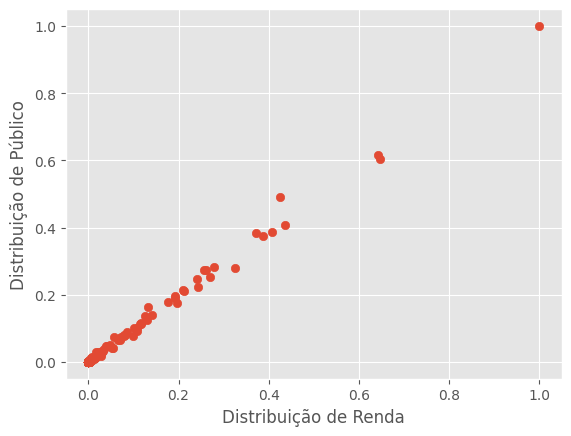

In [346]:
# Relação entre as variáveis permanece a mesma:

_= plt.scatter(X_copia.renda,X_copia.publico)
_= plt.xlabel('Distribuição de Renda')
_= plt.ylabel('Distribuição de Público')

In [347]:
# Codificar saída:

y = y.map({'Estrangeira': 0, 'Brasileira': 1})
y = y.to_numpy()
y

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# **5. Modelo de Rede Neural**

## **5.1 Entradas e saída**

In [348]:
# Importar bilbiotecas para construção da rede neural:

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [349]:
# Transformar a entrada e saída em tensor:

X_tensor = torch.FloatTensor(X)  # Entrada é FloatTensor
Y_tensor = torch.LongTensor(y)    # Classe é LongTensor

## **5.2 Criar a rede**

In [350]:
# Para a criação da rede, estamos usando o sigmoid, pois vamos prever valores binários:
# 'Estrangeira': 0, 'Brasileira': 1

class Net(nn.Module):
    def __init__(self, n_in, n_out):
        super(Net, self).__init__()
        self.linear = nn.Linear(n_in, n_out)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

## **5.3 Instanciar modelo**

In [351]:
# Nosso modelo possui 2 entradas (x0 (renda) + x1 (público)) e uma saída y_pred (nacionalidade)
# Obs: Não precisamos nos preocupar com o bias, pois isso já está embutido

model = Net(2, 1)

## **5.4 Otimização do modelo**

In [352]:
# Definição dos hiperparâmetros do laço de treinamento:

lr = 0.009

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.BCELoss()  # binary cross-entropy

## **5.5 Laço de treinamento**

In [353]:
# Laço de treinamento:

nb_epoch = 10000
losses = []

for i in range(nb_epoch):

    # Predict da rede
    output = model(Variable(X_tensor))

    # Calcula a perda
    loss = criterion(output, Variable(Y_tensor.unsqueeze(1).float()))

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Adiciona as perdas a uma lista
    losses.append(loss.data.item())

    final_loss = loss.data.item()

    # Verbose
    if (i+1) % 100 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(i+1, nb_epoch, loss))

# Imprime a perda final
print('Final loss:', final_loss)


Epoch[100/10000], loss: 0.770149
Epoch[200/10000], loss: 0.733181
Epoch[300/10000], loss: 0.709366
Epoch[400/10000], loss: 0.694116
Epoch[500/10000], loss: 0.684354
Epoch[600/10000], loss: 0.678086
Epoch[700/10000], loss: 0.674037
Epoch[800/10000], loss: 0.671399
Epoch[900/10000], loss: 0.669662
Epoch[1000/10000], loss: 0.668500
Epoch[1100/10000], loss: 0.667708
Epoch[1200/10000], loss: 0.667152
Epoch[1300/10000], loss: 0.666750
Epoch[1400/10000], loss: 0.666447
Epoch[1500/10000], loss: 0.666209
Epoch[1600/10000], loss: 0.666012
Epoch[1700/10000], loss: 0.665843
Epoch[1800/10000], loss: 0.665692
Epoch[1900/10000], loss: 0.665553
Epoch[2000/10000], loss: 0.665422
Epoch[2100/10000], loss: 0.665297
Epoch[2200/10000], loss: 0.665175
Epoch[2300/10000], loss: 0.665056
Epoch[2400/10000], loss: 0.664940
Epoch[2500/10000], loss: 0.664824
Epoch[2600/10000], loss: 0.664711
Epoch[2700/10000], loss: 0.664598
Epoch[2800/10000], loss: 0.664486
Epoch[2900/10000], loss: 0.664375
Epoch[3000/10000], loss

## **5.6 Avaliação**

In [354]:
# Importar bibliotecas para exibir métricas:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [355]:
# Predição
with torch.no_grad():
    y_pred_probs = model(X_tensor)
    y_pred_labels = (y_pred_probs >= 0.5).int().flatten().numpy()

y_true = Y_tensor.numpy().flatten()

# Métricas
accuracy = accuracy_score(y_true, y_pred_labels)
precision = precision_score(y_true, y_pred_labels, zero_division=0)
recall = recall_score(y_true, y_pred_labels, zero_division=0)
f1 = f1_score(y_true, y_pred_labels, zero_division=0)
conf_matrix = confusion_matrix(y_true, y_pred_labels)

# Resultados
print(f'Acurácia  : {accuracy:.4f}')
print(f'Precisão  : {precision:.4f}')
print(f'Recall    : {recall:.4f}')
print(f'F1-Score  : {f1:.4f}')
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia  : 0.6120
Precisão  : 0.0000
Recall    : 0.0000
F1-Score  : 0.0000
Matriz de Confusão:
[[254   0]
 [161   0]]


Como foi possível observar, obtivemos uma acurácia de 61%.
Porém, pela matriz de confusão podemos notar que a classe 1 (Nacionalidade Brasileira) não está sendo identificada. Ou seja, todos os valores são considerados como 0.

In [356]:
y_pred_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Na próxima seção, vamos melhorar nosso modelo com adição de mais variáveis de entrada, além de ajuste do passo, do número de épocas e do otimizador.

# **6. Ajuste na Rede Neural**

In [357]:
# Importar base de dados:

url = 'https://github.com/maxmizard/estatistica/raw/refs/heads/main/listagem-de-filmes-brasileiros-e-estrangeiros-lancados-2009-a-2024.xlsx'
response = requests.get(url)
df_ancine = pd.read_excel(BytesIO(response.content), skiprows=1, nrows=6098)
df_ancine

,Ano de Lançamento,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Salas no Lançamento,Máximo de Salas Ocupadas,Público acumulado,Renda (R$) acumulada
0,2009,1983.. O Ano Azul,B0901024500000,Documentário,Brasil,Brasileira,2009-06-05,Prana Filmes,Distribuição Nacional,2,2,2313,23001.98
1,2009,2012,E1600546500000,Ficção,Estados Unidos,Estrangeira,2009-11-13,Sony,Distribuição Internacional,684,684,5279983,44728067
2,2009,23 Anos Em 7 Segundos: 1977 - O Fim Do Jejum C...,B0901028800000,Documentário,Brasil,Brasileira,2009-06-26,Fox,Distribuição Internacional,7,7,1718,14936
3,2009,3 Macacos,E1402603000000,Ficção,Turquia,Estrangeira,2009-02-27,Imovision,Distribuição Nacional,2,6,13278,128998.84
4,2009,500 Dias Com Ela,E1500675000000,Ficção,Estados Unidos,Estrangeira,2009-11-06,Fox,Distribuição Internacional,37,88,245906,2305334
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,2024,Wish: O Poder Dos Desejos,E2300491500000,Animação,Estados Unidos,Estrangeira,2024-01-04,Disney,Distribuição Estrangeira,1316,1316,1955150,37406745.2
6094,2024,Zé,B2300011000000,Ficção,Brasil,Brasileira,2024-08-29,Embaúba Filmes,Distribuição Nacional,9,9,917,11957.11
6095,2024,Zona De Exclusão,E2400099200000,Ficção,Alemanha; Bélgica; Estados Unidos; França; Pol...,Estrangeira,2024-04-18,A2 Filmes,Distribuição Nacional,8,8,407,6841.08
6096,2024,Zona De Interesse,E2300522600000,Ficção,Estados Unidos; Polônia; Reino Unido,Estrangeira,2024-02-15,Diamond Films Do Brasil,Distribuição Estrangeira,176,176,180774,3783638.01


In [358]:
# Vamos criar um DataFrame para o ano de 2023:

df_ancine_2023 = df_ancine[df_ancine["Ano de Lançamento"]==2023]
df_ancine_2023 = df_ancine_2023.drop(columns=['Ano de Lançamento'], axis=1)
df_ancine_2023.reset_index(drop=True, inplace=True)
df_ancine_2023

,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Salas no Lançamento,Máximo de Salas Ocupadas,Público acumulado,Renda (R$) acumulada
0,13 Exorcismos,E2200426000000,Ficção,Espanha,Estrangeira,2023-02-23,Diamond Films Do Brasil,Distribuição Estrangeira,294,294,115589,2214280.24
1,65 Ameaça Pré-Histórica,E2300025600000,Ficção,Estados Unidos,Estrangeira,2023-03-09,Sony,Distribuição Estrangeira,715,715,237849,4678152.92
2,97 Minutos,E2300279400000,Ficção,Estados Unidos,Estrangeira,2023-10-19,Cinecolor Do Brasil,Distribuição Estrangeira,82,82,4263,79867.88
3,A Alma Quer Voar,B2100203300000,Ficção,Brasil; Colômbia,Brasileira,2023-05-18,Retrato Filmes,Distribuição Nacional,2,2,129,1441.87
4,A Baleia,E2300007400000,Ficção,Estados Unidos,Estrangeira,2023-02-23,Califórnia Filmes,Distribuição Nacional,209,273,433381,10781408.04
...,...,...,...,...,...,...,...,...,...,...,...,...
410,Van Gogh: Campos De Trigo E Céus Nublados,E2200285900000,Documentário,Itália,Estrangeira,2023-07-27,Risi Film,Distribuição Estrangeira,2,2,113,1471
411,Velozes E Furiosos 10,E2300058300000,Ficção,Estados Unidos,Estrangeira,2023-05-18,Warner,Distribuição Estrangeira,2277,2277,6461862,133934493.9
412,Vento Na Fronteira,B2100315800000,Documentário,Brasil,Brasileira,2023-06-08,Taturana,Distribuição Nacional,2,2,266,3918.69
413,Vidas Descartáveis,B2300135700000,Documentário,Brasil,Brasileira,2023-08-24,Bretz Filmes,Distribuição Nacional,1,1,71,1359.83


In [359]:
# Selecionar entrada

X = df_ancine_2023[['Público acumulado', 'Renda (R$) acumulada', 'Salas no Lançamento', 'Máximo de Salas Ocupadas']]
X = X.rename(columns={'Público acumulado': 'publico', 'Renda (R$) acumulada': 'renda', 'Salas no Lançamento': 'salas_lancamento', 'Máximo de Salas Ocupadas': 'maximo_salas'})
X

,publico,renda,salas_lancamento,maximo_salas
0,115589,2214280.24,294,294
1,237849,4678152.92,715,715
2,4263,79867.88,82,82
3,129,1441.87,2,2
4,433381,10781408.04,209,273
...,...,...,...,...
410,113,1471,2,2
411,6461862,133934493.9,2277,2277
412,266,3918.69,2,2
413,71,1359.83,1,1


In [360]:
# Padronizar X:
# OBS: O y permanece o mesmo

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_copia = pd.DataFrame(X, columns=['publico', 'renda', 'salas_lancamento', 'maximo_salas'])
X
print(X.shape)

(415, 4)


In [361]:
# Transformar a entrada e saída em tensor:

X_tensor = torch.FloatTensor(X)  # Entrada é FloatTensor
Y_tensor = torch.LongTensor(y)    # Classe é LongTensor

In [362]:
# Criar rede com classe python:

class RedeNeuralMelhorada(nn.Module):
    def __init__(self):
        super(RedeNeuralMelhorada, self).__init__()
        self.fc1 = nn.Linear(4, 16)          # de 4 para 16 neurônios
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(16, 8)          # nova camada intermediária
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.leaky_relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.fc3(x))
        return x

In [363]:
# Definir modelo:
model = RedeNeuralMelhorada()

In [364]:
# Hiperparâmetros do laço de treinamento:
lr = 0.005
optimizer = torch.optim.Adam(model.parameters(), lr=lr) #Alterando otimizador
criterion = nn.BCELoss()  # binary cross-entropy

In [365]:
# Laço de treinamento:

nb_epoch = 15000
losses = []

for i in range(nb_epoch):

    # Predict da rede
    output = model(Variable(X_tensor))

    # Calcula a perda
    loss = criterion(output, Variable(Y_tensor.unsqueeze(1).float()))

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Adiciona as perdas a uma lista
    losses.append(loss.data.item())

    final_loss = loss.data.item()

    # Verbose
    if (i+1) % 100 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(i+1, nb_epoch, loss))

# Imprime a perda final
print('Final loss:', final_loss)


Epoch[100/15000], loss: 0.611630
Epoch[200/15000], loss: 0.613244
Epoch[300/15000], loss: 0.584449
Epoch[400/15000], loss: 0.589525
Epoch[500/15000], loss: 0.581156
Epoch[600/15000], loss: 0.563283
Epoch[700/15000], loss: 0.568534
Epoch[800/15000], loss: 0.576485
Epoch[900/15000], loss: 0.562240
Epoch[1000/15000], loss: 0.550007
Epoch[1100/15000], loss: 0.552562
Epoch[1200/15000], loss: 0.555995
Epoch[1300/15000], loss: 0.545792
Epoch[1400/15000], loss: 0.554118
Epoch[1500/15000], loss: 0.561694
Epoch[1600/15000], loss: 0.562633
Epoch[1700/15000], loss: 0.562761
Epoch[1800/15000], loss: 0.557301
Epoch[1900/15000], loss: 0.551883
Epoch[2000/15000], loss: 0.541300
Epoch[2100/15000], loss: 0.565132
Epoch[2200/15000], loss: 0.536115
Epoch[2300/15000], loss: 0.543001
Epoch[2400/15000], loss: 0.547215
Epoch[2500/15000], loss: 0.542002
Epoch[2600/15000], loss: 0.542902
Epoch[2700/15000], loss: 0.534352
Epoch[2800/15000], loss: 0.553627
Epoch[2900/15000], loss: 0.532791
Epoch[3000/15000], loss

In [366]:
# Exibir métricas:

# Predição
with torch.no_grad():
    y_pred_probs = model(X_tensor)
    y_pred_labels = (y_pred_probs >= 0.5).int().flatten().numpy()

y_true = Y_tensor.numpy().flatten()

# Métricas
accuracy = accuracy_score(y_true, y_pred_labels)
precision = precision_score(y_true, y_pred_labels, zero_division=0)
recall = recall_score(y_true, y_pred_labels, zero_division=0)
f1 = f1_score(y_true, y_pred_labels, zero_division=0)
conf_matrix = confusion_matrix(y_true, y_pred_labels)

# Resultados
print(f'Acurácia  : {accuracy:.4f}')
print(f'Precisão  : {precision:.4f}')
print(f'Recall    : {recall:.4f}')
print(f'F1-Score  : {f1:.4f}')
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia  : 0.7398
Precisão  : 0.6934
Recall    : 0.5901
F1-Score  : 0.6376
Matriz de Confusão:
[[212  42]
 [ 66  95]]


# **7. Validação**

In [367]:
# Filtrar colunas e normalizar com o MESMO scaler usado na base de filmes de 2023:
X_2024 = df_ancine_2024[['Público acumulado', 'Renda (R$) acumulada', 'Salas no Lançamento', 'Máximo de Salas Ocupadas']]
X_2024 = X_2024.rename(columns={
    'Público acumulado': 'publico',
    'Renda (R$) acumulada': 'renda',
    'Salas no Lançamento': 'salas_lancamento',
    'Máximo de Salas Ocupadas': 'maximo_salas'
})

# Usar o scaler treinado com 2023:
X_2024_scaled = scaler.transform(X_2024)

# Converter as entradas para tensor:
X_2024_tensor = torch.FloatTensor(X_2024_scaled)

# Predizer com a rede treinada:
with torch.no_grad():
    y_2024_pred_probs = model(X_2024_tensor)
    y_2024_pred_labels = (y_2024_pred_probs >= 0.5).int().flatten().numpy()

# Se a nacionalidade de 2024 estiver disponível:
if 'Nacionalidade da obra' in df_ancine_2024.columns:
    y_2024_true = df_ancine_2024['Nacionalidade da obra'].map({'Estrangeira': 0, 'Brasileira': 1}).fillna(0).astype(int).to_numpy()

    # Calcular métricas

    print(f"Acurácia  : {accuracy_score(y_2024_true, y_2024_pred_labels):.4f}")
    print(f"Precisão  : {precision_score(y_2024_true, y_2024_pred_labels, zero_division=0):.4f}")
    print(f"Recall    : {recall_score(y_2024_true, y_2024_pred_labels, zero_division=0):.4f}")
    print(f"F1-Score  : {f1_score(y_2024_true, y_2024_pred_labels, zero_division=0):.4f}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_2024_true, y_2024_pred_labels))
else:
    print("Nacionalidade da obra não disponível em df_ancine_2024 para validação completa.")


Acurácia  : 0.7456
Precisão  : 0.7547
Recall    : 0.6091
F1-Score  : 0.6742
Matriz de Confusão:
[[220  39]
 [ 77 120]]


# **8. Conclusão**

Nesse projeto foi possível aplicar uma classificação binária via rede neural para identificar a nacionalidade (estrangeira ou brasileira) de filmes lançados no Brasil em 2023.

Inicialmente não obtivemos um bom resultado na construção da rede, visto a pouca quantidade de variáveis de entrada e limitações de otimização.

Porém, ao adicionarmos mais neurônios, camadas ocultas e ajustes na otimização, o modelo registrou melhora no processo de aprendizado. Isso foi perceptível no aumento da acurácia e na validação realizada com uma outra base de filmes - desta vez do ano de 2024.